# __Diabetic Patient Classification__

# Setup

In [6]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import confusion_matrix

## Import the Dataset

In [8]:
data = pd.read_csv('diabetic_data.csv')

In [9]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [10]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [11]:
data.describe(include='object')

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,5346,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,6,3,10,10,18,73,717,749,790,3,...,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),?,?,?,428,276,250,Norm,...,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26068,98569,40256,49949,6862,6752,11555,2597,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [13]:
data.isna().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

There are too many missing values in `max_glu_serum` and `A1Cresult` columns

In [15]:
# Check out colums with non-numeric values
data.dtypes[data.dtypes == object]

race                        object
gender                      object
age                         object
weight                      object
payer_code                  object
medical_specialty           object
diag_1                      object
diag_2                      object
diag_3                      object
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone                object
rosiglitazone               object
acarbose                    object
miglitol                    object
troglitazone                object
tolazamide                  object
examide                     object
citoglipton                 object
insulin             

In [16]:
# Value counts of the target
data['readmitted'].value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

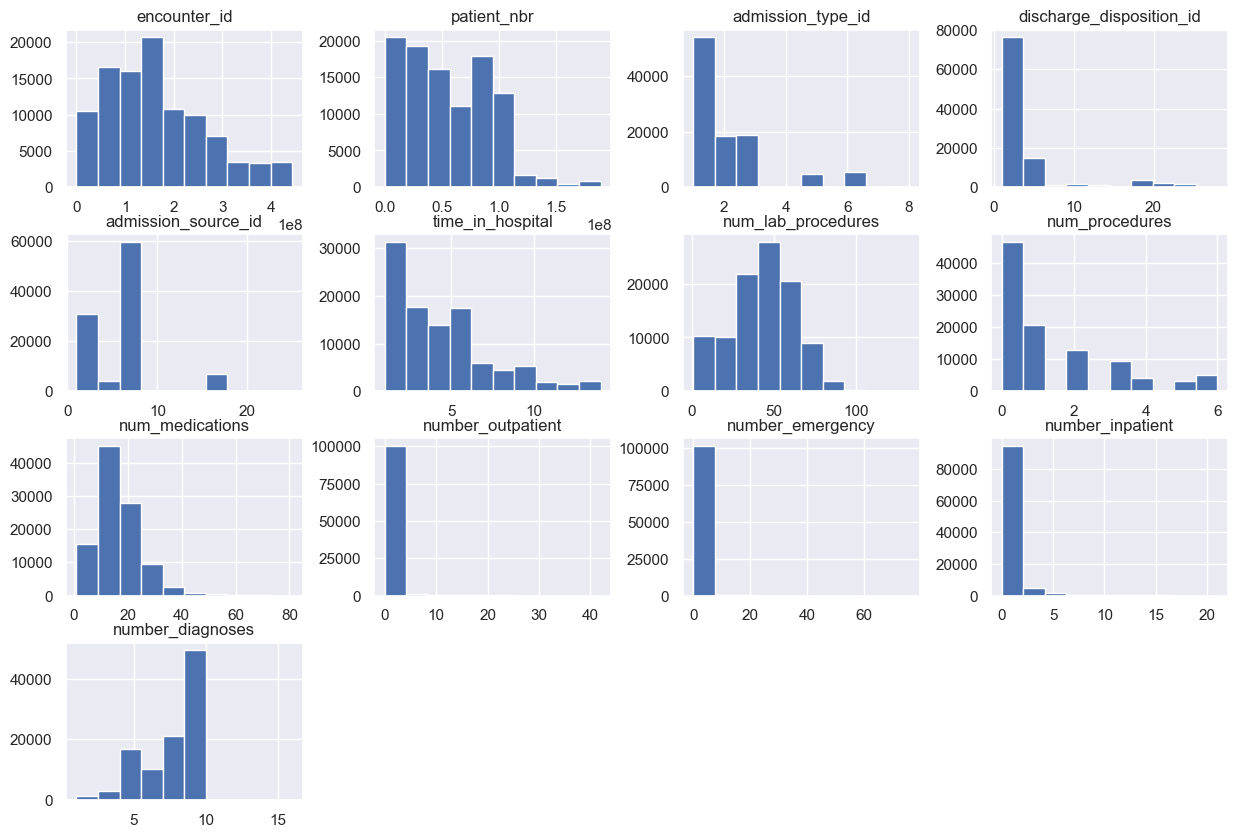

In [17]:
# Distributions of numerical data
ax = data.hist(figsize=(15,10))

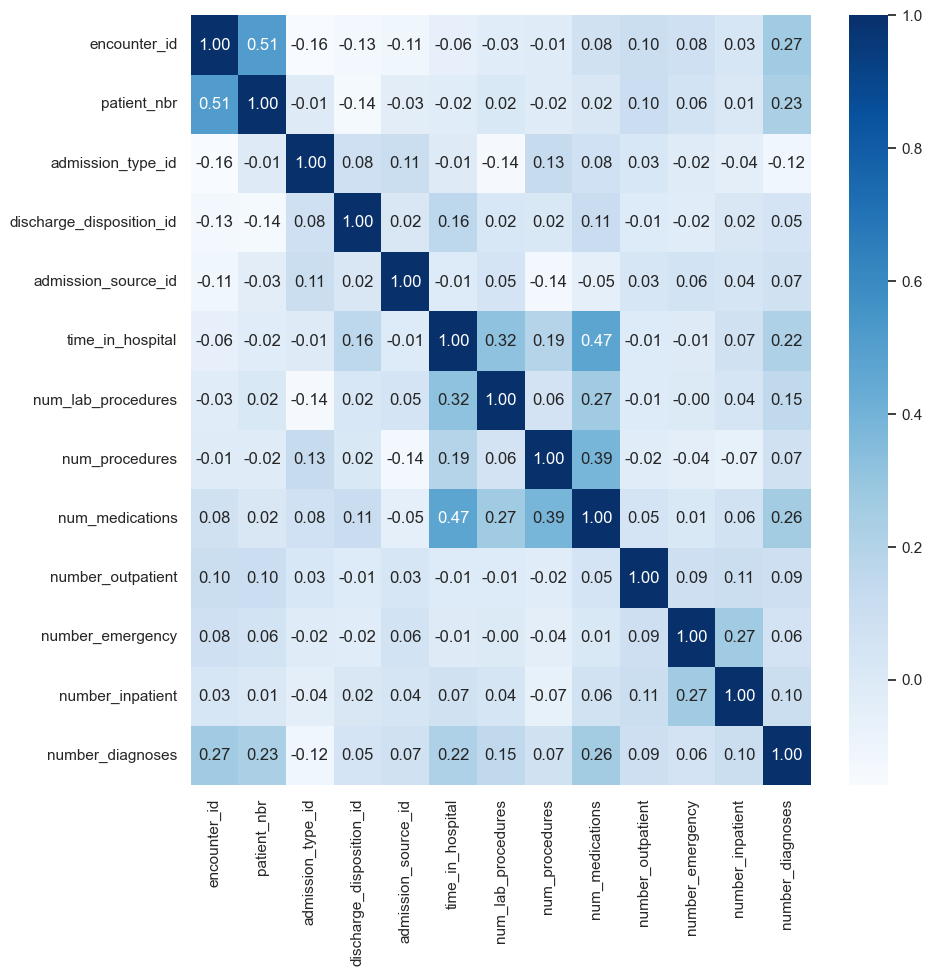

In [18]:
# Correlations bewteen numerical variables
corr_matrix = data[data.dtypes[data.dtypes == 'int64'].index].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='Blues')
plt.show()

In [19]:
object_cols_idx = []
for idx, column in enumerate(data.dtypes.index, start=0):
    if data[column].dtype == object:
        object_cols_idx.append((idx, column))

In [20]:
object_cols_idx

[(2, 'race'),
 (3, 'gender'),
 (4, 'age'),
 (5, 'weight'),
 (10, 'payer_code'),
 (11, 'medical_specialty'),
 (18, 'diag_1'),
 (19, 'diag_2'),
 (20, 'diag_3'),
 (22, 'max_glu_serum'),
 (23, 'A1Cresult'),
 (24, 'metformin'),
 (25, 'repaglinide'),
 (26, 'nateglinide'),
 (27, 'chlorpropamide'),
 (28, 'glimepiride'),
 (29, 'acetohexamide'),
 (30, 'glipizide'),
 (31, 'glyburide'),
 (32, 'tolbutamide'),
 (33, 'pioglitazone'),
 (34, 'rosiglitazone'),
 (35, 'acarbose'),
 (36, 'miglitol'),
 (37, 'troglitazone'),
 (38, 'tolazamide'),
 (39, 'examide'),
 (40, 'citoglipton'),
 (41, 'insulin'),
 (42, 'glyburide-metformin'),
 (43, 'glipizide-metformin'),
 (44, 'glimepiride-pioglitazone'),
 (45, 'metformin-rosiglitazone'),
 (46, 'metformin-pioglitazone'),
 (47, 'change'),
 (48, 'diabetesMed'),
 (49, 'readmitted')]

In [21]:
drug_data = data.iloc[:, 24:47]
drug_data.head()

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,...,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
0,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Up,No,No,No,No,No
2,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Up,No,No,No,No,No
4,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,No,Steady,No,No,No,No,No


In [22]:
# Inspect categories in drug data
drugs_unique_vals = {}
for name in drug_data.columns:
    drugs_unique_vals[name] = [v for v in drug_data[name].unique()]

drugs_unique_vals

{'metformin': ['No', 'Steady', 'Up', 'Down'],
 'repaglinide': ['No', 'Up', 'Steady', 'Down'],
 'nateglinide': ['No', 'Steady', 'Down', 'Up'],
 'chlorpropamide': ['No', 'Steady', 'Down', 'Up'],
 'glimepiride': ['No', 'Steady', 'Down', 'Up'],
 'acetohexamide': ['No', 'Steady'],
 'glipizide': ['No', 'Steady', 'Up', 'Down'],
 'glyburide': ['No', 'Steady', 'Up', 'Down'],
 'tolbutamide': ['No', 'Steady'],
 'pioglitazone': ['No', 'Steady', 'Up', 'Down'],
 'rosiglitazone': ['No', 'Steady', 'Up', 'Down'],
 'acarbose': ['No', 'Steady', 'Up', 'Down'],
 'miglitol': ['No', 'Steady', 'Down', 'Up'],
 'troglitazone': ['No', 'Steady'],
 'tolazamide': ['No', 'Steady', 'Up'],
 'examide': ['No'],
 'citoglipton': ['No'],
 'insulin': ['No', 'Up', 'Steady', 'Down'],
 'glyburide-metformin': ['No', 'Steady', 'Down', 'Up'],
 'glipizide-metformin': ['No', 'Steady'],
 'glimepiride-pioglitazone': ['No', 'Steady'],
 'metformin-rosiglitazone': ['No', 'Steady'],
 'metformin-pioglitazone': ['No', 'Steady']}

__Insight:__
<br>
There are no unrecorded values in drug columns

In [24]:
# Inspect other categorical features
other_cat_cols = ['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 
                  'diag_3', 'max_glu_serum', 'A1Cresult', 'change', 'diabetesMed', 'readmitted']
                  
other_cat_data = data[other_cat_cols]
other_cat_data

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),?,?,Pediatrics-Endocrinology,250.83,?,?,NaN,NaN,No,No,NO
1,Caucasian,Female,[10-20),?,?,?,276,250.01,255,NaN,NaN,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),?,?,?,648,250,V27,NaN,NaN,No,Yes,NO
3,Caucasian,Male,[30-40),?,?,?,8,250.43,403,NaN,NaN,Ch,Yes,NO
4,Caucasian,Male,[40-50),?,?,?,197,157,250,NaN,NaN,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),?,MC,?,250.13,291,458,NaN,>8,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),?,MC,?,560,276,787,NaN,NaN,No,Yes,NO
101763,Caucasian,Male,[70-80),?,MC,?,38,590,296,NaN,NaN,Ch,Yes,NO
101764,Caucasian,Female,[80-90),?,MC,Surgery-General,996,285,998,NaN,NaN,Ch,Yes,NO


In [25]:
# Inspect categories in drug data
other_unique_vals = {}
for name in other_cat_data.columns:
    if len(other_cat_data[name].unique()) < 25:
        other_unique_vals[name] = [v for v in other_cat_data[name].unique()]

other_unique_vals

{'race': ['Caucasian', 'AfricanAmerican', '?', 'Other', 'Asian', 'Hispanic'],
 'gender': ['Female', 'Male', 'Unknown/Invalid'],
 'age': ['[0-10)',
  '[10-20)',
  '[20-30)',
  '[30-40)',
  '[40-50)',
  '[50-60)',
  '[60-70)',
  '[70-80)',
  '[80-90)',
  '[90-100)'],
 'weight': ['?',
  '[75-100)',
  '[50-75)',
  '[0-25)',
  '[100-125)',
  '[25-50)',
  '[125-150)',
  '[175-200)',
  '[150-175)',
  '>200'],
 'payer_code': ['?',
  'MC',
  'MD',
  'HM',
  'UN',
  'BC',
  'SP',
  'CP',
  'SI',
  'DM',
  'CM',
  'CH',
  'PO',
  'WC',
  'OT',
  'OG',
  'MP',
  'FR'],
 'max_glu_serum': [nan, '>300', 'Norm', '>200'],
 'A1Cresult': [nan, '>7', '>8', 'Norm'],
 'change': ['No', 'Ch'],
 'diabetesMed': ['No', 'Yes'],
 'readmitted': ['NO', '>30', '<30']}

The `diag_1`, `diag_2`, and `diag_3` columns are not included in the unique element list since they have more than 700 unique values.
<br>
Also, there seem to be a `?` value in some columns that represent unrecorded values

In [27]:
# Let's see what columns got the ? value
# Inspect categories in drug data
for name in other_cat_data.columns:
    if '?' in other_cat_data[name].unique():
        print(f"{name} {len(other_cat_data[other_cat_data[name] == '?'])}")

race 2273
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423


In [28]:
# Replace '?' values with nan values
data_rep_ques = data.replace('?', np.nan)

In [29]:
# Let's see how many missing values in total we have got and their ratios
# Function to get all the missing values
def all_missing_values(df):
    missing_values = {}
    for col in df.columns:
        if df[col].isna().sum() > 0:
            missing_values[col] = {'count': df[col].isna().sum(), 
                                   'percentage': round((df[col].isna().sum() / df.shape[0]) * 100, 2)}
    return missing_values

In [30]:
pd.DataFrame(all_missing_values(data_rep_ques))

,race,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult
count,2273.00,98569.00,40256.00,49949.00,21.00,358.00,1423.0,96420.00,84748.00
percentage,2.23,96.86,39.56,49.08,0.02,0.35,1.4,94.75,83.28


# Handling Missing Values

* Remove all the columns that has >80% missing values
* There are ≈49% values missing in the `medical_speciality` columns which represents medical speciality of the admitting physician. This is a variable that cannot be imputed as it will misdirect the model. Therefore we will drop this column.
* The `payer_code` represent the entitiy that payed the medical fees of the patient. This column has ≈39% of the values missing. The missing values cannto be imputed because doing so will misdirect the model. On the assumption that a patient will readmit purely based on the medical condition and not on financial situation we will remove this column.
* The `diag_1`, `diag_2`, and `diag_3` columns' missing values cannot be imputed, but there is only a small number (<1.5%). Therefore the corresponding rows will be removed.

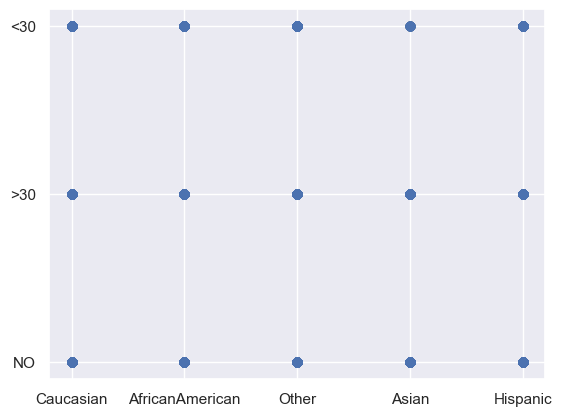

In [33]:
# Relationship between race and readmittence
no_mis_race_df = data_rep_ques[(data_rep_ques['race'].isna()).apply(lambda x: not x)]

plt.scatter(no_mis_race_df['race'], no_mis_race_df['readmitted'])
plt.show()

In [34]:
no_mis_race_vc = no_mis_race_df.groupby('race')['readmitted'].value_counts()
no_mis_race_c = no_mis_race_df.groupby('race')['readmitted'].count()
no_mis_race_vc / no_mis_race_c * 100

race             readmitted
AfricanAmerican  NO            54.247788
                 >30           34.534097
                 <30           11.218116
Asian            NO            64.742590
                 >30           25.117005
                 <30           10.140406
Caucasian        NO            53.066400
                 >30           35.643044
                 <30           11.290556
Hispanic         NO            58.075601
                 >30           31.516937
                 <30           10.407462
Other            NO            60.756972
                 >30           29.614874
                 <30            9.628154
dtype: float64

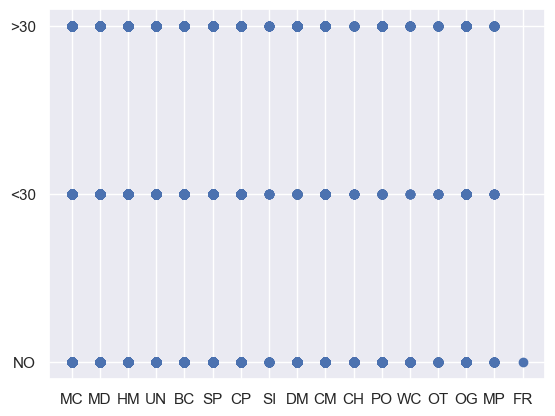

In [35]:
# Relationship between payer_code and readmittence
no_mis_payer_code_df = data_rep_ques[(data_rep_ques['payer_code'].isna()).apply(lambda x: not x)]

plt.scatter(no_mis_payer_code_df['payer_code'], no_mis_payer_code_df['readmitted'])
plt.show()

In [36]:
payer_code_vc = no_mis_payer_code_df.groupby('payer_code')['readmitted'].value_counts()

payer_code_c = no_mis_payer_code_df.groupby('payer_code')['readmitted'].count()

payer_code_vc / payer_code_c * 100

payer_code  readmitted
BC          NO             62.900107
            >30            27.948443
            <30             9.151450
CH          NO             68.493151
            >30            22.602740
            <30             8.904110
CM          NO             55.653072
            >30            34.124935
            <30            10.221993
CP          NO             60.718516
            >30            30.833004
            <30             8.448480
DM          NO             48.269581
            >30            40.072860
            <30            11.657559
FR          NO            100.000000
HM          NO             52.757412
            >30            36.978004
            <30            10.264584
MC          NO             51.317858
            >30            36.937020
            <30            11.745122
MD          NO             52.576444
            >30            35.645527
            <30            11.778029
MP          >30            49.367089
            NO 

* There does not seem to be any relationship bewteen the `race` and `readmitted`. Therefore, let's drop it.

In [38]:
data_dropped_cols = data_rep_ques.copy()

# Remove the selected columns
data_dropped_cols = data_dropped_cols.drop(['weight', 'max_glu_serum', 'A1Cresult', 'payer_code', 'medical_specialty', 'race'], axis=1)

In [39]:
# Remove rows conating missing values for `diag_1`, `diag_2`, and `diag_3`
data_dropped_rows = data_dropped_cols.dropna(axis=0, subset=['diag_1', 'diag_2', 'diag_3'])

In [40]:
# Check
all_missing_values(data_dropped_rows)

{}

In [41]:
# Checkpoint
data_no_mv = data_dropped_rows.copy()
data_no_mv.head()

,encounter_id,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Female,[10-20),1,1,7,3,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,Female,[20-30),1,1,7,2,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Male,[30-40),1,1,7,2,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Male,[40-50),1,1,7,1,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Male,[50-60),2,1,2,3,31,6,...,No,Steady,No,No,No,No,No,No,Yes,>30


## Duplicated values

In [43]:
# Function to check for duplicated values in numerical columns
def get_duplicates(df):
    n_cols = list(df.dtypes[df.dtypes == 'int64'].index)
    duplicates = {}
    for idx, col in enumerate(n_cols):
        duplicates[col] = df[col].duplicated().sum()
    return duplicates

get_duplicates(data_no_mv)

{'encounter_id': 0,
 'patient_nbr': 29828,
 'admission_type_id': 100236,
 'discharge_disposition_id': 100218,
 'admission_source_id': 100227,
 'time_in_hospital': 100230,
 'num_lab_procedures': 100126,
 'num_procedures': 100237,
 'num_medications': 100169,
 'number_outpatient': 100205,
 'number_emergency': 100211,
 'number_inpatient': 100224,
 'number_diagnoses': 100230}

__Insight:__
<br>
There are multiple recores for the same person, these are seperate admissions for the same patient at different points in time. We'll remove the duplicates except for first occurances since when the patient addmit again, he

# Feature Engineering

In [46]:
data_no_mv.dtypes[data_no_mv.dtypes == 'int64']

encounter_id                int64
patient_nbr                 int64
admission_type_id           int64
discharge_disposition_id    int64
admission_source_id         int64
time_in_hospital            int64
num_lab_procedures          int64
num_procedures              int64
num_medications             int64
number_outpatient           int64
number_emergency            int64
number_inpatient            int64
number_diagnoses            int64
dtype: object

In [47]:
data_no_mv.dtypes[data_no_mv.dtypes == 'object']

gender                      object
age                         object
diag_1                      object
diag_2                      object
diag_3                      object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone                object
rosiglitazone               object
acarbose                    object
miglitol                    object
troglitazone                object
tolazamide                  object
examide                     object
citoglipton                 object
insulin                     object
glyburide-metformin         object
glipizide-metformin         object
glimepiride-pioglitazone    object
metformin-rosiglitazone     object
metformin-pioglitazone      object
change              

Since `encounter_id` does not affect a patients readmission, drop it.

In [49]:
# 5: Not available; 6,8: Not mapped
data_no_mv['admission_type_id'].value_counts()

admission_type_id
1    53232
3    18545
2    18203
6     5199
5     4719
8      315
7       21
4       10
Name: count, dtype: int64

In [50]:
# 16: Not available; 17: Not mapped
data_no_mv['discharge_disposition_id'].value_counts()

discharge_disposition_id
1     59005
3     13897
6     12830
18     3642
2      2115
22     1982
11     1640
5      1167
25      956
4       805
7       604
23      406
13      398
14      371
28      138
8       107
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: count, dtype: int64

In [51]:
# 9: Not available
data_no_mv['admission_source_id'].value_counts()

admission_source_id
7     56799
1     29036
17     6683
4      3144
6      2144
2      1092
5       852
3       179
20      161
9       112
8        15
22       12
10        8
14        2
11        2
25        2
13        1
Name: count, dtype: int64

In [52]:
data_no_mv[data_no_mv['patient_nbr'].duplicated()]

,encounter_id,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
79,1070256,23043240,Female,[50-60),2,1,4,3,41,4,...,No,Steady,No,No,No,No,No,No,Yes,>30
81,1077924,21820806,Male,[50-60),1,6,7,3,52,0,...,No,No,No,No,No,No,No,No,No,NO
143,2309376,41606064,Male,[20-30),2,1,2,2,35,0,...,No,Steady,No,No,No,No,No,No,Yes,>30
175,2552952,86240259,Female,[70-80),1,3,7,11,44,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
307,3174918,5332491,Female,[60-70),6,25,7,5,58,1,...,No,Steady,No,No,No,No,No,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,443847176,50375628,Female,[60-70),1,1,7,6,45,1,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101761,443847548,100162476,Male,[70-80),1,3,7,3,51,0,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,Female,[80-90),1,4,5,5,33,3,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Male,[70-80),1,1,7,1,53,0,...,No,Down,No,No,No,No,No,Ch,Yes,NO


In [99]:
data_no_mv[data_no_mv['patient_nbr'] == 50375628]

,encounter_id,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
46441,143247264,50375628,Female,[60-70),1,1,7,2,37,3,...,No,No,No,No,No,No,No,No,No,>30
61710,172123572,50375628,Female,[60-70),1,1,7,2,18,0,...,No,Down,No,No,No,No,No,Ch,Yes,>30
64762,180190776,50375628,Female,[60-70),1,1,7,2,41,0,...,No,Down,No,No,No,No,No,Ch,Yes,>30
78512,239936226,50375628,Female,[60-70),1,1,7,10,60,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
81570,252908004,50375628,Female,[60-70),1,1,7,8,42,1,...,No,Up,No,No,No,No,No,Ch,Yes,>30
95238,359084438,50375628,Female,[60-70),1,1,7,8,59,1,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
101760,443847176,50375628,Female,[60-70),1,1,7,6,45,1,...,No,Down,No,No,No,No,No,Ch,Yes,>30


In [97]:
data_no_mv[data_no_mv['patient_nbr'] == 23043240]['number_inpatient']

68       0
79       1
12923    0
Name: number_inpatient, dtype: int64

In [101]:
data_no_mv['discharge_disposition_id'].unique()

array([ 1,  3,  6,  2,  5, 11,  7, 25, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27], dtype=int64)